In [ ]:
!git clone https://github.com/sitdownman/-.git

Cloning into '-'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 12 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), done.


# 加载数据

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv(r"/content/-/cookie_cats.csv")


df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


# 描述数据

In [ ]:
df["userid"].nunique()

90189

In [ ]:
df.groupby("version")[["userid"]].nunique()

,userid
version,
gate_30,44700
gate_40,45489


sum_gamerounds
0        3994
1        5538
2        4606
3        3958
4        3629
         ... 
2294        1
2438        1
2640        1
2961        1
49854       1
Name: userid, Length: 942, dtype: int64


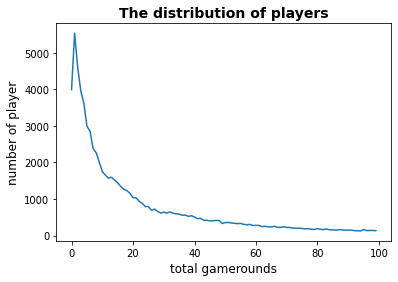

In [ ]:
# 游戏场次分布
plot_df = df.groupby("sum_gamerounds")["userid"].count()
print(plot_df)
# 查看游戏场次在0-100的人数分布情况
ax = plot_df.head(100).plot()
plt.title("The distribution of players", fontweight="bold", size=14)
plt.xlabel("total gamerounds", size=12)
plt.ylabel("number of player", size=12)
plt.show()
#有将近4000人下载游戏但一局没玩

In [ ]:
# 统计对照组和实验组一日留存和七日留存
df_retention_mean = df.groupby("version").agg({"userid":"count", "retention_1":"mean","retention_7":"mean", "sum_gamerounds":"sum"})
print(df_retention_mean)
df_retention_std = df.groupby("version").agg({ "retention_1":"std","retention_7":"std"})
print(df_retention_std)

         userid  retention_1  retention_7  sum_gamerounds
version                                                  
gate_30   44700     0.448188     0.190201         2344795
gate_40   45489     0.442283     0.182000         2333530
         retention_1  retention_7
version                          
gate_30     0.497314     0.392464
gate_40     0.496663     0.385849


# 假设检验

发现解锁关卡设在30关的留存率比在40关的高，是否存在随机因素导致如此，按A/B测试显著性检验进行计算：

原假设：解锁关卡设置在30关的次日留存率不高于设置在40关的次日留存率

备择假设：解锁关卡设置在30关的次日留存率高于设置在40关的次日留存率

右侧检验，设立显著性水平：α = 0.05​​

根据公式计算Z值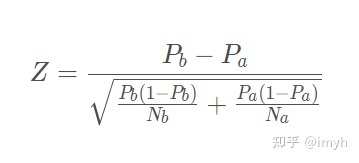 一日留存：Z= -1.7840 查表得 拒绝阈值为-1.64 因为Z小于阈值所以拒绝原假设。结论：解锁关卡设置在30关的次日留存率高于设置在40关的次日留存率 ；七日留存：Z=-3.1640 查表得 拒绝阈值为-1.64 因为Z小于阈值所以拒绝原假设。结论：解锁关卡设置在30关的七日留存率高于设置在40关的七日留存率。

由以上分析，若要提升次日留存率和七日留存率，将解锁关卡设置在30关好于40关。但根据“40-20-10”的留存率规则，无论设置在30关还是40关，次日留存率均大于40%达到优秀水准，七日留存率均未小于20%未达到优秀水准，可以再结合其他因素如：游戏难度，游戏画面等，来进行内容优化来提升留存率。

# 求置信区间

In [ ]:
import numpy as np
import scipy.stats as st

In [ ]:
# 定义求P值函数，使其能够与显著性水平比较。
def get_pvalue(con_conv, test_conv, con_size, test_size):  
    lift =  - abs(test_conv - con_conv)

    scale_one = con_conv * (1 - con_conv) * (1 / con_size)
    scale_two = test_conv * (1 - test_conv) * (1 / test_size)
    scale_val = (scale_one + scale_two)**0.5

    p_value = 2 * st.norm.cdf(lift, loc = 0, scale = scale_val )

    return p_value

In [ ]:
# 定义求置信区间函数
def get_ci(value, cl, sd):
  loc = st.norm.ppf(1 - cl/2)
  rng_val = st.norm.cdf(loc - value/sd)

  lwr_bnd = value - rng_val
  upr_bnd = value + rng_val 

  return_val = (lwr_bnd, upr_bnd)
  return(return_val)

In [ ]:
# 新方案40关卡 一日留存的P值
p_value_1 = get_pvalue(con_conv=0.448188, test_conv=0.442283, con_size=44700, test_size=45489	)

# 一日留存的置信区间
ci_1 = get_ci(0.442283,0.95,0.496663 )

print('把新方案应用到全体用户有百分之95的概率落在区间')
print(ci_1)

把新方案应用到全体用户有百分之95的概率落在区间
(0.23839181524984054, 0.6461741847501594)


In [ ]:
# 新方案40关卡 七日留存的P值
p_value_7 = get_pvalue(con_conv=0.190201, test_conv=0.182000, con_size=44700, test_size=45489)

# 七日留存的置信区间
ci_7 = get_ci(0.182000,0.95,0.385849 )

print('新方案的P值为 , 把新方案应用到全体用户有百分之95的概率落在区间')
print(ci_7)
# 新方案比原方案转化率低很多，其实没有验证的必要。

新方案的P值为 , 把新方案应用到全体用户有百分之95的概率落在区间
(-0.15927704711951912, 0.5232770471195192)
